# BYO-doped k-seq least-squares estimation results
This note book contains the point estimation and bootstrap results analyses/visualization

In [1]:
from yuning_util.dev_mode import DevMode
dev_mode = DevMode('k-seq')
dev_mode.on()

from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 240

# Point estimation

In [2]:
from k_seq.data.seq_table import SeqTable

RES_CSV_PATH = '/mnt/storage/projects/k-seq/working/byo_doped/least_square/point-est_bounded_pod_10-21-19/fit_summary.csv'
byo_doped = SeqTable.load_default_dataset(dataset='byo_doped')
point_est_res = pd.read_csv(RES_CSV_PATH, index_col=0)

Load BYO-doped pool data from pickled record from /mnt/storage/projects/k-seq/datasets/byo_doped.pkl
Imported!


In [4]:
point_est_res['input_counts'] = byo_doped.table_filtered.loc[point_est_res.index, 'R0'].sparse.to_dense() + 0.1
point_est_res['all_detected'] = point_est_res.index.isin(byo_doped.table_in_all_samples.index.values)
point_est_res['kA'] = point_est_res.k * point_est_res.A
point_est_res = point_est_res.loc[~point_est_res.isna().any(axis=1)]

In [5]:
point_est_res

,k,A,input_counts,all_detected,kA
CTACTTCAAACAATCGGTCTG,209.576805,0.419282,1452168.1,True,87.871727
CCACACTTCAAGCAATCGGTC,155.360038,0.455281,1246770.1,True,70.732523
ATTACCCTGGTCATCGAGTGA,679.435538,0.287239,1114058.1,True,195.160061
AAGTTTGCTAATAGTCGCAAG,164.256725,0.176522,1421715.1,True,28.994925
GTACTTCAAACAATCGGTCTG,169.874871,0.306387,85808.1,True,52.047506
...,...,...,...,...,...
CCTCACTTCAAGCCATTGATC,0.020391,0.032159,2.1,False,0.000656
AAGTTTGCTAATGGCTGCAAA,0.020391,0.032159,2.1,False,0.000656
CCACACCTCAACCAATCTGCC,0.010577,0.049764,1.1,False,0.000526
CGACCTCAAACAACCGGTCAG,0.020391,0.032159,2.1,False,0.000656


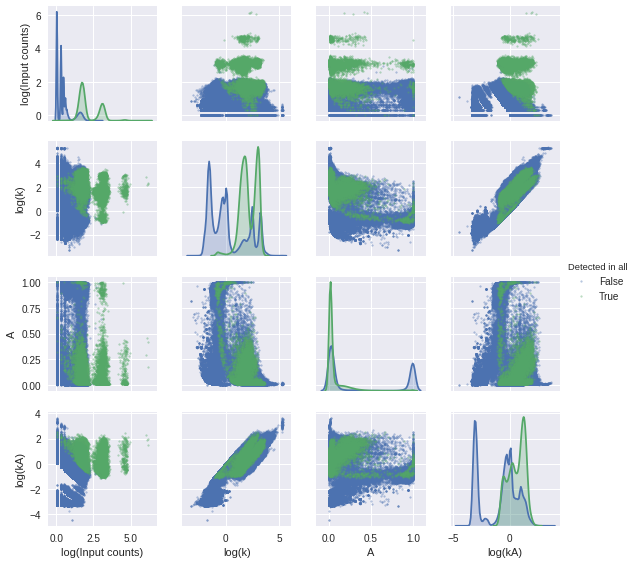

In [78]:
save_fig_to = '/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/doped_pool_point_est_dist.jpeg'
cols = ['input_counts', 'k', 'A', 'kA', 'all_detected']
names = ['Input counts', 'k', 'A', 'kA', 'Detected in all']
logs = [True, True, False, True, False]
df = res_table
import seaborn as sns

data_to_plot = {}
for name, col, log in zip(names, cols, logs):
    if log:
        data_to_plot[f'log({name})'] = np.log10(df[col])
    else:
        data_to_plot[name] = df[col]
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data=data_to_plot, vars=data_to_plot.columns.values[:-1], diag_kind='kde', height=2, markers='.',
             hue='Detected in all',
             plot_kws={'edgecolor':None, 'alpha': 0.3, 's':10})

if save_fig_to:
    fig = plt.gcf()
    fig.patch.set_alpha(0)
    fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

## Relations of k, A, kA, or relative abundance in the initial pool

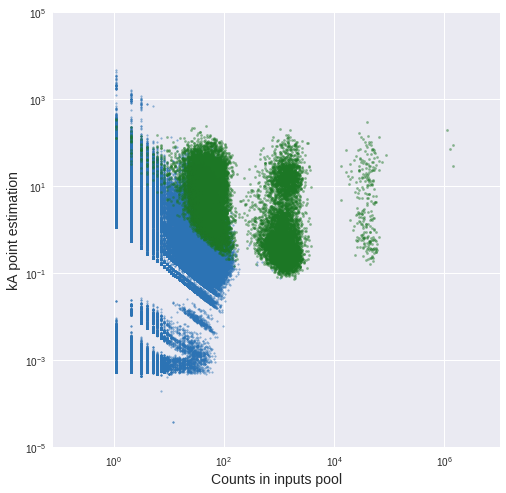

In [8]:
save_fig_to = '/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/ka_counts_ls_pnt_est.jpeg'

import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

ax.scatter(res_table.loc[res_table['all_detected'], 'input_counts'],
           res_table.loc[res_table['all_detected'],  'kA'], s=5, color='#1C7725', alpha=0.5, zorder=2)
ax.scatter(res_table.loc[~res_table['all_detected'], 'input_counts'],
           res_table.loc[~res_table['all_detected'], 'kA'], s=3, color='#2C73B4', alpha=0.5, zorder=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.08, 1e7])
ax.set_ylim([1e-5, 1e5])
ax.set_xlabel('Counts in inputs pool', fontsize=14)
ax.set_ylabel('kA point estimation', fontsize=14)

if save_fig_to:
    fig.patch.set_alpha(0)
    fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

plt.show()

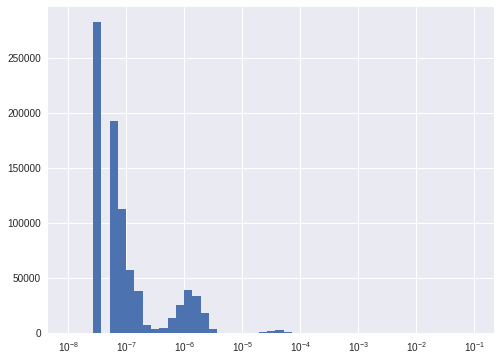

In [173]:
def dist_rel_abun(bin_num=20, bin_range=None, figsize=None):
    import matplotlib.pyplot as plt
    
    if bin_range is None:
        bin_range = [-8, -1]
    if figsize is None:
        figsize = [8, 6]
    
    fig, ax = plt.subplots(1, 1, figsize=[8, 6])
    bins = np.logspace(-8, -1, bin_num, base=10)
    ax.hist(res_table.rel_abun, bins=bins)
    ax.set_xscale('log')
    plt.show()
    
dist_rel_abun(bin_num=50)

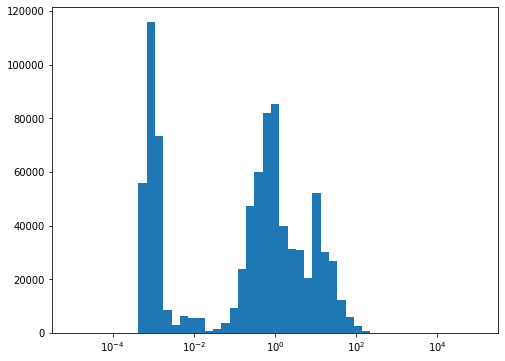

In [169]:
fig, ax = plt.subplots(1, 1, figsize=[8, 6])
bins = np.logspace(-5, 5, 50)
ax.hist(res_table.kA, bins=bins)
ax.set_xscale('log')
plt.show()

# Uncertainty: Bootstrap results

In [6]:
bootstrap_res = pd.read_csv('/mnt/storage/projects/k-seq/working/byo_doped/least_square/bs-pct-res-bounded_pod_10-27-19/fit_summary.csv', index_col='Unnamed: 0')
bootstrap_res['input_counts'] = point_est_res['input_counts'][bootstrap_res.index] - 0.1
def get_seq_class(seq):
    if seq['input_counts'] >= 5e5:
        return 4
    elif seq['input_counts'] >= 8e3:
        return 3
    elif seq['input_counts'] >= 2e2:
        return 2
    elif seq['input_counts'] >= 1:
        return 1
    else:
        return 0
bootstrap_res['class'] = bootstrap_res.apply(get_seq_class, axis=1)

In [68]:
bootstrap_res

,k,A,kA,k_mean,k_std,k_2.5%,k_50%,k_97.5%,A_mean,A_std,A_2.5%,A_50%,A_97.5%,kA_mean,kA_std,kA_2.5%,kA_50%,kA_97.5%,input_counts,class
CTACTTCAAACAATCGGTCTG,209.576575,0.419282,87.871647,209.294277,48.807784,115.636204,212.410306,302.446449,0.391087,0.039036,0.329493,0.384933,0.478138,80.469043,14.576352,52.296764,80.888363,108.309281,1452168.0,4
CCACACTTCAAGCAATCGGTC,155.360034,0.455281,70.732521,162.170144,39.189374,90.986799,159.941031,234.612345,0.421794,0.044881,0.350183,0.414900,0.524415,67.210611,12.902003,45.133172,66.214455,92.875414,1246770.0,4
ATTACCCTGGTCATCGAGTGA,679.435268,0.287239,195.159993,694.479866,154.800273,430.410768,678.543817,1013.196155,0.297186,0.023513,0.254048,0.297472,0.341078,204.080538,37.312180,137.120358,200.543031,276.413476,1114058.0,4
AAGTTTGCTAATAGTCGCAAG,164.256716,0.176522,28.994923,169.983334,53.309205,80.688170,166.715687,272.334881,0.163142,0.022727,0.124239,0.161287,0.212663,26.851982,6.325247,15.622940,26.878984,38.655715,1421715.0,4
GTACTTCAAACAATCGGTCTG,169.874846,0.306387,52.047499,173.539354,42.101450,96.245926,171.566355,253.607752,0.282380,0.031388,0.232245,0.278356,0.353009,48.129345,9.355280,30.894812,47.584682,67.003873,85808.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTACTCTGGTCAACGAGTGA,261.382524,0.020099,5.253484,295.107320,223.506022,33.175472,258.230175,853.815692,0.039732,0.035249,0.018599,0.036846,0.064810,9.393239,4.845768,1.676115,9.273359,19.911150,38.0,1
ATTACCCCTGTCCTCGAGTGA,1027.030440,0.016900,17.356338,1090.359330,622.921896,94.175374,1016.406758,2555.854158,0.015744,0.003430,0.009918,0.015468,0.023353,15.818872,7.499247,2.132939,15.464944,31.319339,41.0,1
ATTAGCCCTGTCATCGAGTGA,1454.624406,0.013493,19.627393,1544.615718,936.678395,108.221810,1426.983010,3791.962627,0.014070,0.003324,0.009164,0.013671,0.021974,19.769438,9.779496,2.490464,19.513743,41.852519,45.0,1
AGTACCCGGGACATCGAGTGA,440.291968,0.023271,10.245859,481.497226,328.769447,50.947285,403.241793,1252.858754,0.035134,0.012141,0.019608,0.033826,0.059401,14.670891,7.928753,2.311684,14.019457,32.532270,34.0,1


In [29]:
from k_seq.utility import file_tools
results = file_tools.read_pickle('/mnt/storage/projects/k-seq/working/byo_doped/least_square/bs-pct-res-bounded_pod_10-27-19/results.pkl')

In [ ]:
res_table

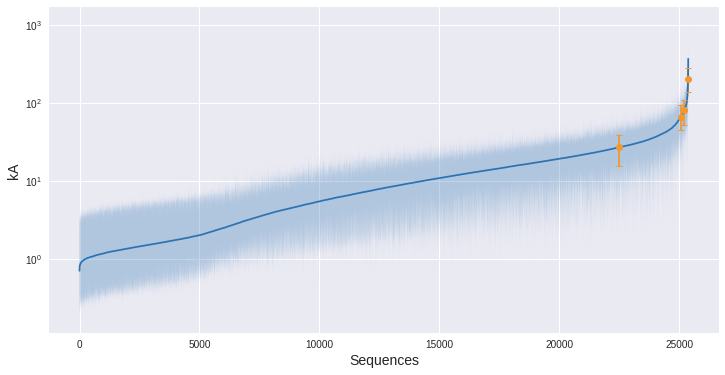

In [14]:
from k_seq.estimator import visualizer
reload(visualizer)


visualizer.param_value_plot(res_table, param='kA', line_postfix='_50%', show_shade=True, sort_by='kA_50%',
                            highlight_seq=['CTACTTCAAACAATCGGTCTG', 'CCACACTTCAAGCAATCGGTC',
                                           'ATTACCCTGGTCATCGAGTGA', 'AAGTTTGCTAATAGTCGCAAG'],
                            y_log=True, save_fig_to='/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/ci_est_ka.jpeg')

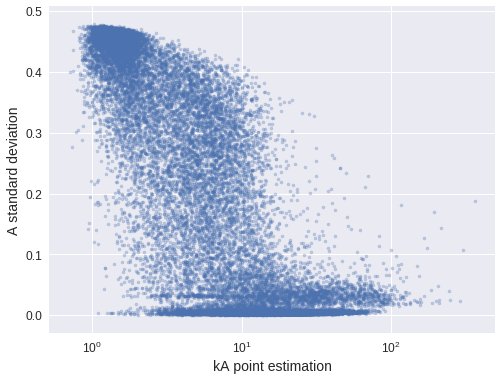

In [18]:
# save_fig_to = '/mnt/storage/projects/k-seq/output/2019-11-21_RU_figs/a_std_vs_ka_point_est.jpeg'

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(bootstrap_res['kA_50%'], bootstrap_res['A_std'], s=10, alpha=0.3)
ax.set_xlabel('kA point estimation', fontsize=14)
ax.set_ylabel('A standard deviation', fontsize=14)
ax.set_xscale('log')
ax.tick_params(labelsize=12)

# if save_fig_to:
#     fig.patch.set_alpha(0)
#     fig.savefig(save_fig_to, bbox_inches='tight', dpi=300)

plt.show()

## Cross compare point estimation results with bootstrap mean and median

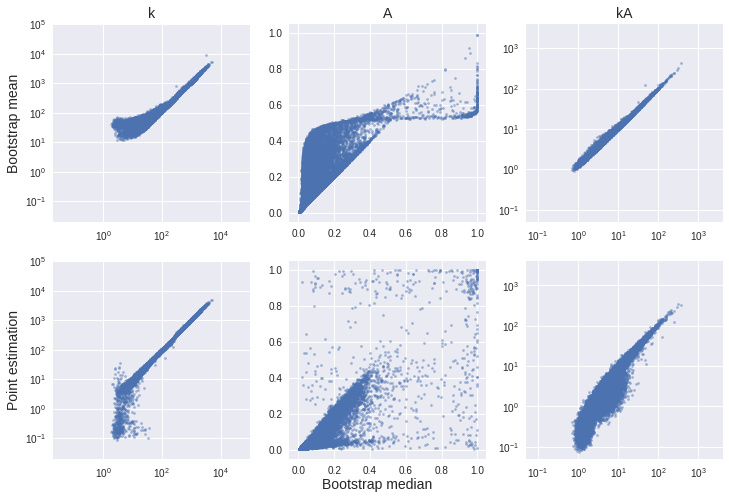

In [33]:
k_lim = [2e-2, 1e5]
a_lim = [-0.05, 1.05]
ka_lim = [5e-2, 4e3]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
seqs = bootstrap_res.index

axes[0][0].scatter(bootstrap_res['k_50%'], bootstrap_res['k_mean'], alpha=0.5, s=5)
axes[1][0].scatter(bootstrap_res['k_50%'], point_est_res['k'][seqs], alpha=0.5, s=5)
axes[0][0].set_xscale('log')
axes[1][0].set_xscale('log')
axes[0][0].set_yscale('log')
axes[1][0].set_yscale('log')
axes[0][0].set_xlim(k_lim)
axes[1][0].set_xlim(k_lim)
axes[0][0].set_ylim(k_lim)
axes[1][0].set_ylim(k_lim)
axes[0][0].set_title('k', fontsize=14)

axes[0][1].scatter(bootstrap_res['A_50%'], bootstrap_res['A_mean'], alpha=0.5, s=5)
axes[1][1].scatter(bootstrap_res['A_50%'], point_est_res['A'][seqs], alpha=0.5, s=5)
axes[0][1].set_xlim(a_lim)
axes[1][1].set_xlim(a_lim)
axes[0][1].set_ylim(a_lim)
axes[1][1].set_ylim(a_lim)
axes[0][1].set_title('A', fontsize=14)

axes[0][2].scatter(bootstrap_res['kA_50%'], bootstrap_res['kA_mean'], alpha=0.5, s=5)
axes[1][2].scatter(bootstrap_res['kA_50%'], point_est_res['kA'][seqs], alpha=0.5, s=5)

axes[0][2].set_xscale('log')
axes[1][2].set_xscale('log')
axes[0][2].set_yscale('log')
axes[1][2].set_yscale('log')
axes[0][2].set_xlim(ka_lim)
axes[1][2].set_xlim(ka_lim)
axes[0][2].set_ylim(ka_lim)
axes[1][2].set_ylim(ka_lim)
axes[0][2].set_title('kA', fontsize=14)

axes[0][0].set_ylabel('Bootstrap mean', fontsize=14)
axes[1][0].set_ylabel('Point estimation', fontsize=14)

fig.text(s='Bootstrap median', x=0.5, y=0.08, fontsize=14, ha='center', va='center')

plt.show()

## Percent error of bootstrap results
### Standard deviation or 95% percentile?

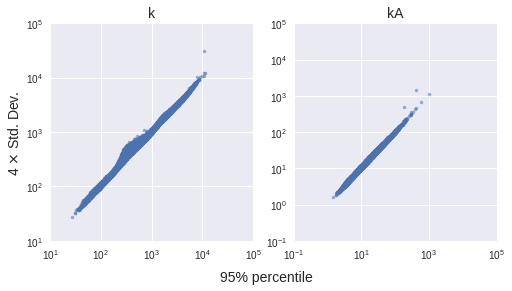

In [40]:
k_lim = [10, 1e5]
ka_lim = [1e-1, 1e5]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(bootstrap_res['k_97.5%'] - bootstrap_res['k_2.5%'],
                4 * bootstrap_res['k_std'], alpha=0.5, s=10)

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(k_lim)
axes[0].set_ylim(k_lim)
axes[0].set_title('k', fontsize=14)


axes[1].scatter(bootstrap_res['kA_97.5%'] - bootstrap_res['kA_2.5%'],
                4 * bootstrap_res['kA_std'], alpha=0.5, s=10)

axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim(ka_lim)
axes[1].set_ylim(ka_lim)
axes[1].set_title('kA', fontsize=14)

axes[0].set_ylabel(r'4 $\times$ Std. Dev.', fontsize=14)

fig.text(s='95% percentile', x=0.5, y=0.0, fontsize=14, ha='center', va='center')

plt.show()

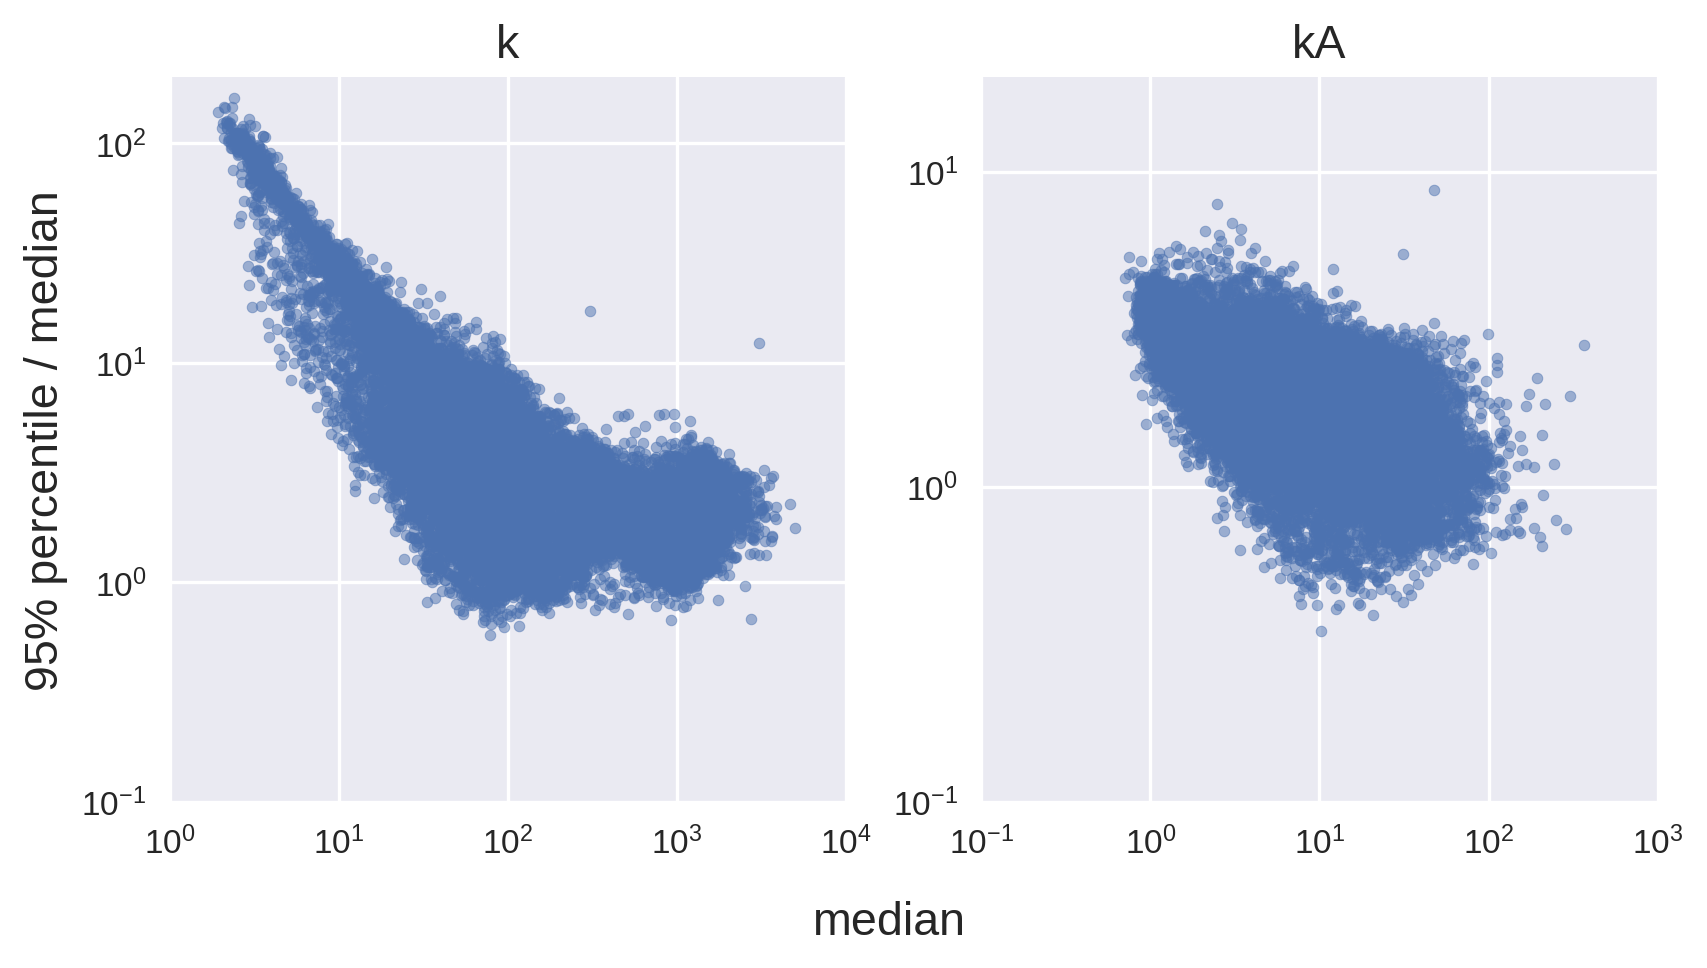

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].scatter(bootstrap_res['k_50%'],
                (bootstrap_res['k_97.5%'] - bootstrap_res['k_2.5%'])/bootstrap_res['k_50%'],
                alpha=0.5, s=10)

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim([1, 1e4])
axes[0].set_ylim([1e-1, 2e2])
axes[0].set_title('k', fontsize=14)


axes[1].scatter(bootstrap_res['kA_50%'],
                (bootstrap_res['kA_97.5%'] - bootstrap_res['kA_2.5%'])/bootstrap_res['kA_50%'],
                alpha=0.5, s=10)

axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim([1e-1, 1e3])
axes[1].set_ylim([1e-1, 20])
axes[1].set_title('kA', fontsize=14)

axes[0].set_ylabel(r'95% percentile / median', fontsize=14)

fig.text(s='median', x=0.5, y=0.0, fontsize=14, ha='center', va='center')

plt.show()

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [15]:
def text_formatter(seq):
    return f"<b>{seq.name}</b><br><br>" + f"Input counts: {seq['input_counts']:,.0f}<br>"


fig = go.Figure()
for c in [0, 1, 2, 3, 4]:
    data = bootstrap_res[bootstrap_res['class'] == c]
    if data.shape[0] > 1000:
        data = data.sample(n=1000, replace=False)
    fig.add_trace(
        go.Scatter(
            x=data['kA_50%'],
            y=(data['kA_97.5%'] - data['kA_2.5%'])/data['kA_50%'],
            name=f'Class {c}',
            text=list(data.apply(text_formatter, axis=1)),
            hovertemplate=
            "%{text}" +
            "kA median : %{x:,.2f}<br>" +
            "95-percentile/median: %{y:,.}",
            marker_size= 2 * c + 2,
            mode='markers'
        )
    )
fig.update_layout(
    xaxis={
        'title': 'Bootstrap median',
        'type': 'log'
    },
    yaxis={
        'title': '95% percentile / median',
        'type': 'log'
    }
)
fig.show()

In [60]:
bootstrap_res['input_counts']

CTACTTCAAACAATCGGTCTG    1452168.0
CCACACTTCAAGCAATCGGTC    1246770.0
ATTACCCTGGTCATCGAGTGA    1114058.0
AAGTTTGCTAATAGTCGCAAG    1421715.0
GTACTTCAAACAATCGGTCTG      85808.0
                           ...    
CTTACTCTGGTCAACGAGTGA         38.0
ATTACCCCTGTCCTCGAGTGA         41.0
ATTAGCCCTGTCATCGAGTGA         45.0
AGTACCCGGGACATCGAGTGA         34.0
ATCAGCCTGGTCATCGCGTGA         62.0
Name: input_counts, Length: 25385, dtype: float64

/home/yuning/.pyenv/versions/k-seq/bin/ipython:5: UserWarning:

Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



(0.4466835921509631, 10000000.0)

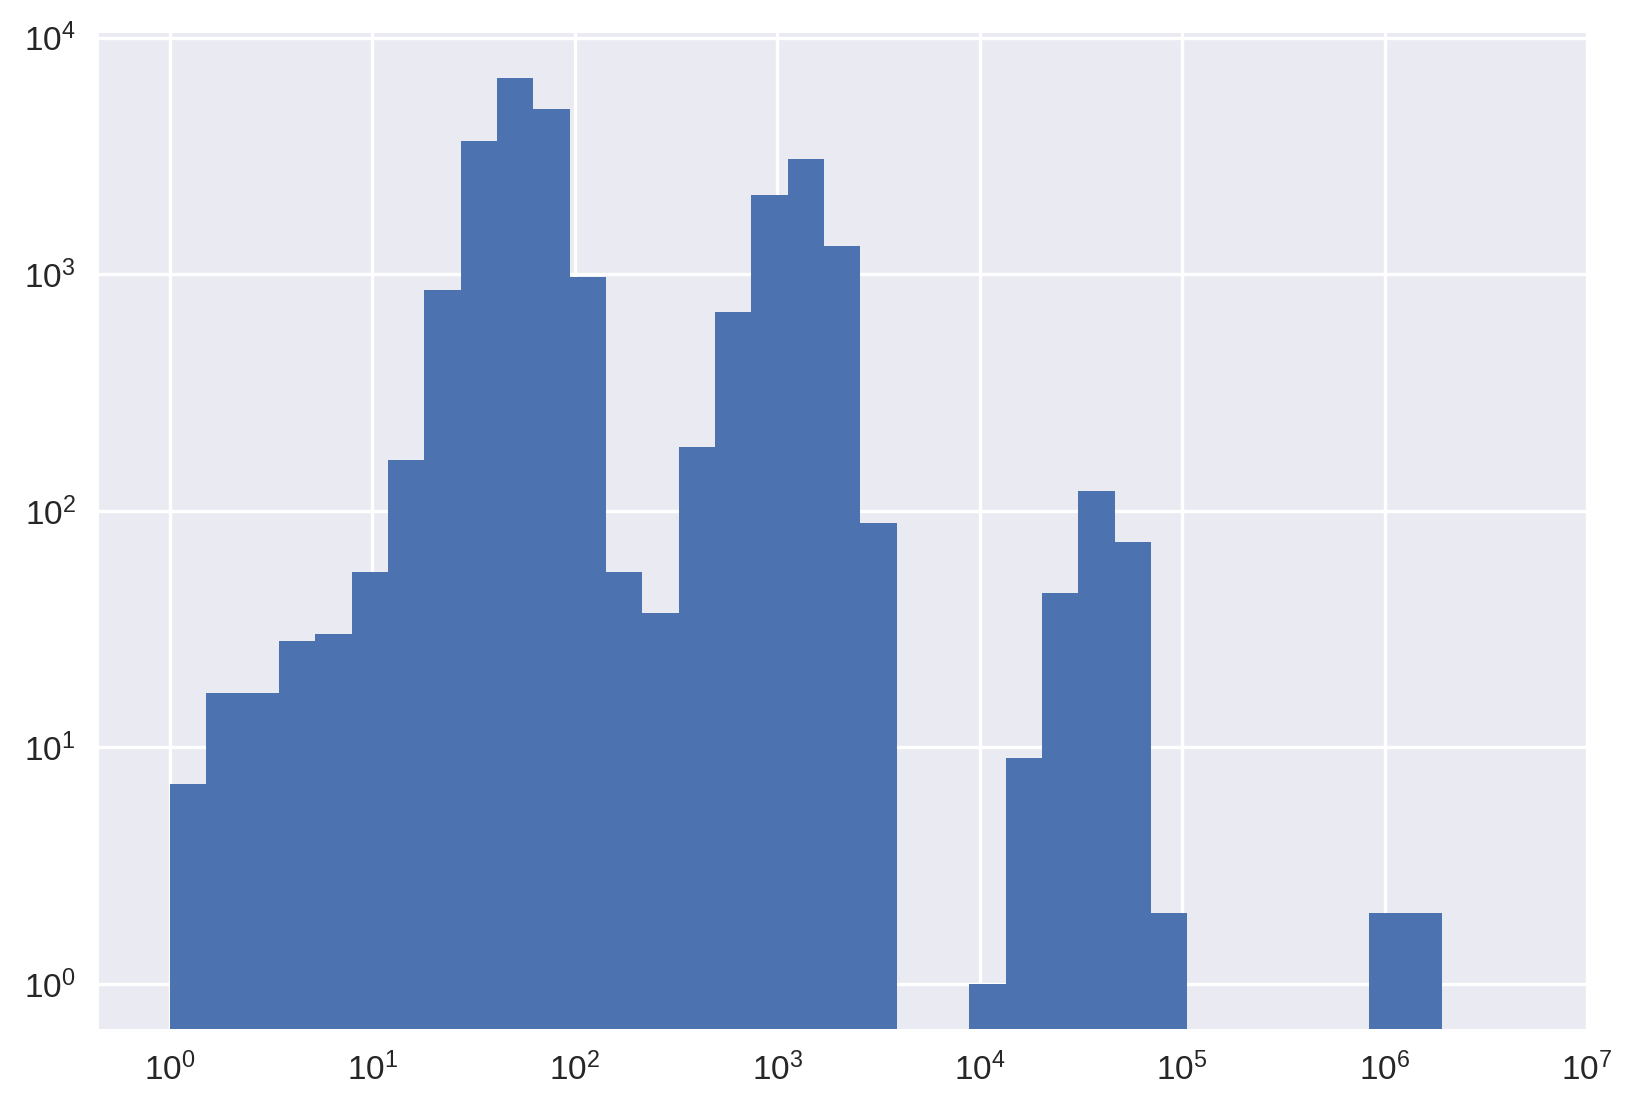

# Compare to previous estimation
Here we used old results of k-seq on selected pool with Abe's script for comparison
> `/mnt/storage/projects/k-seq/datasets/byo_on_abes_method/allseqs-name-fit_repeat.csv`

As well as reported value in the paper

In [17]:
REF_PATH = '/mnt/storage/projects/k-seq/datasets/byo_on_abes_method/allseqs-name-fit_repeat.csv'
ref_table = pd.read_csv(REF_PATH, index_col='X')[2:]
ref_table

,Abun R5c-counts.txt,L by avg,k by avg,L stdev,k stdev
X,,,,,
GGGGGGAGAAGTTAATGG,0.000191,0.999411,50.765753,0.000000,0.000000
GGGGGAAATGTCAGGTCATGC,0.000191,0.337199,0.674452,0.007564,0.015246
GGGGGAAATTCCAAGGTCATG,0.000191,0.975867,14.310327,0.314230,39.507303
GGGGGAATCCTACGTGTCAAG,0.000191,0.710566,3.027453,0.294333,4.993080
GGGGGAACCGGGTGGCCCCGA,0.000191,0.337198,0.674450,0.007562,0.015242
...,...,...,...,...,...
CCCCC,0.000382,0.337199,0.674452,0.007564,0.015246
CCCC,0.000382,0.999564,55.043066,0.001454,22.233369
CCC,0.002290,0.993262,23.779244,0.009470,17.871010


In [20]:
ref_table.loc['CTACTTCAAACAATCGGTCTG']

Abun R5c-counts.txt      15.233418
L by avg                  0.282805
k by avg               5219.032763
L stdev                   0.068896
k stdev                1749.466495
Name: CTACTTCAAACAATCGGTCTG, dtype: float64

In [ ]:
selected_seqs = {
    'S-2.1-a': ('ATTACCCTGGTCATCGAGTGA', 779, 0.161),
    'S-2.1-t': ('ATTACCCTGGTCATCGAGTGT', 729, 0.158),
    'S-1A.1-a': ('CTACTTCAAACAATCGGTCTG', 121, 0.283),
    'S-1B.1-a': ('CCACACTTCAAGCAATCGGTC', 46.2, 0.865),
   # 'S-1B.2-a': ('CCGCTTCAAGCAATCGGTCGC', 47.3, 0.669),
    'S-1B.3-a': ('CCGAGTTTCAAGCAATCGGTC', 71.2, 0.458),
    'S-3.1-a': ('AAGTTTGCTAATAGTCGCAAG', 142, 0.134),
   # 'S-2.2-a': ('ATTCACCTAGGTCATCGGGTG', 197, 0.132),
   # 'S-1A.1-n': ('CTCTTCAAACAATCGGTCTTC', 74.9, 0.251),
    'S-1C.1-a': ('CTCTTCAATAATCGGTTGCGT', 6.65, 1.000)
}
